Netflix is one of the most popular media and video streaming platforms. They have over 10000 movies or tv shows available on their platform, as of mid-2021, they have over 222M Subscribers globally. This tabular dataset consists of listings of all the movies and tv shows available on Netflix, along with details such as - cast, directors, ratings, release year, duration, etc.

Analyze the data and generate insights that could help Netflix ijn deciding which type of shows/movies to produce and how they can grow the business in different countries

In [100]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import gdown
import warnings

In [4]:
google_drive_link = "https://drive.google.com/uc?id=1CnFGVTgYjHqkJRthv2FwEMiCE644gJg5"
output_file = "Netflix_Dataset.csv"
gdown.download(google_drive_link, output_file, quiet=False)

Downloading...
From: https://drive.google.com/uc?id=1CnFGVTgYjHqkJRthv2FwEMiCE644gJg5
To: /Users/yashanni/Netflix_Dataset.csv
100%|██████████| 3.40M/3.40M [00:00<00:00, 7.68MB/s]


'Netflix_Dataset.csv'

In [101]:
warnings.filterwarnings("ignore", category=FutureWarning)

In [30]:
df = pd.read_csv(output_file)

### Defining Problem Statement and Analysing basic metrics

PROBLEM STATEMENT : Analyze the data and generate insights that could help Netflix in deciding which type of shows/movies to produce and how they can grow the business in different countries. By seeing the Data of netflix I observed Netflix is one of the most popular media and video streaming platforms. They have over 10000 movies or tv shows available on their platform, as of mid-2021, they have over 222M Subscribers globally. 1.How has the number of movies released per year changed over the last 20-30 years? 2.Comparison of tv shows vs. movies? 3.What is the best time to launch a TV show? 4.Analysis of actors/directors of different types of shows/movies. 5.Does Netflix has more focus on TV Shows than movies in recent years 6.Understanding what content is available in different countries

In [59]:
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [35]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


### Observations on the shape of data, data types of all the attributes, conversion of categorical attributes to 'category' (If required), missing value detection, statistical summary


In [66]:
# Filtering  Data Column wise so that each row has one director,one genre,one actor, one country

# 1. Separting Casts in each column
constraint2=df["cast"].apply(lambda x: str(x).split(', ')).tolist()
df_new2=pd.DataFrame(constraint2,index=df['title'])
df_new2=df_new2.stack()
df_new2=pd.DataFrame(df_new2.reset_index())
df_new2.rename(columns={0:'Actors'},inplace=True)
df_new2.drop(['level_1'],axis=1,inplace=True)
df_new2.head(20)

# 2.Separting Country in each column
constraint3=df["country"].apply(lambda x:str(x).split(', ')).tolist()
df_new3=pd.DataFrame(constraint3,index=df["title"])
df_new3=df_new3.stack()
df_new3=pd.DataFrame(df_new3.reset_index())
df_new3.rename(columns={0:"country"},inplace=True)
df_new3.drop(columns="level_1",axis=1,inplace=True)

# 3. Separting Genres in each column
constraint4=df["listed_in"].apply(lambda x:str(x).split(', ')).tolist()
df_new4=pd.DataFrame(constraint4,index=df["title"])
df_new4=df_new4.stack()
df_new4=pd.DataFrame(df_new4.reset_index())
df_new4.rename(columns={0:"Genre"},inplace=True)
df_new4.drop(columns="level_1",axis=1,inplace=True)

# 5. Separting Directors in each column
constraint5=df["director"].apply(lambda x:str(x).split(', ')).tolist()
df_new5=pd.DataFrame(constraint5,index=df["title"])
df_new5=df_new5.stack()
df_new5=pd.DataFrame(df_new5.reset_index())
df_new5.rename(columns={0:"director"},inplace=True)
df_new5.drop(columns="level_1",axis=1,inplace=True)

#merging actor and country
df1=pd.merge(df_new2,df_new3,on="title",how="inner")
#merging df1 and genre
df2=pd.merge(df1,df_new4,on="title",how="inner")
#merging df2 and director
df3=pd.merge(df2,df_new5,on="title",how="inner")

# Replace NAN values
df3["director"].replace(["nan"],["UnKnown Director"],inplace=True)
df3["Actors"].replace(["nan"],["Unknown Actor"],inplace=True)
df3["country"].replace(["nan"],[np.nan],inplace=True)

# JOining above merged data with original data i.e df
df_final=df3.merge(df[["title","show_id","type","date_added","release_year","rating","duration"]],on="title",how="left")

# making new column Month i,e extracting month from Date_added column
df_final["month"]=df_final["date_added"].apply(lambda x:str(x).split(','))
df_final["month"]=df_final["month"].str[-2]

In [68]:
# now Separating above filtered data into two types i.e MOVIES & TV-SHOWS
def myfunc(data):
    if data == "Movie":
        return 1
    else:
        return 0

df_final["new"] = df_final["type"].apply(myfunc)

# MOVIES
df_final_movies = df_final[df_final["new"] == 1].copy()
# TV-SHOWS
df_final_season = df_final[df_final["new"] == 0].copy()

# Dropping column new from movies data and TV-SHOW data
df_final_season.drop(columns=["new"], inplace=True)
df_final_movies.drop(columns=["new"], inplace=True)


In [69]:
# droping  show_id and date_added column from both filtered movies and tv-shows
df_final_movies=df_final_movies.drop(columns=["show_id","date_added"])
df_final_season=df_final_season.drop(columns=["show_id","date_added"])

In [70]:
df_final_movies

,title,Actors,country,Genre,director,type,release_year,rating,duration,month
0,Dick Johnson Is Dead,Unknown Actor,United States,Documentaries,Kirsten Johnson,Movie,2020,PG-13,90 min,September 25
159,My Little Pony: A New Generation,Vanessa Hudgens,NaN,Children & Family Movies,Robert Cullen,Movie,2021,PG,91 min,September 24
160,My Little Pony: A New Generation,Vanessa Hudgens,NaN,Children & Family Movies,José Luis Ucha,Movie,2021,PG,91 min,September 24
161,My Little Pony: A New Generation,Kimiko Glenn,NaN,Children & Family Movies,Robert Cullen,Movie,2021,PG,91 min,September 24
162,My Little Pony: A New Generation,Kimiko Glenn,NaN,Children & Family Movies,José Luis Ucha,Movie,2021,PG,91 min,September 24
...,...,...,...,...,...,...,...,...,...,...
201986,Zubaan,Anita Shabdish,India,International Movies,Mozez Singh,Movie,2015,TV-14,111 min,March 2
201987,Zubaan,Anita Shabdish,India,Music & Musicals,Mozez Singh,Movie,2015,TV-14,111 min,March 2
201988,Zubaan,Chittaranjan Tripathy,India,Dramas,Mozez Singh,Movie,2015,TV-14,111 min,March 2
201989,Zubaan,Chittaranjan Tripathy,India,International Movies,Mozez Singh,Movie,2015,TV-14,111 min,March 2


In [71]:
df_final_season

,title,Actors,country,Genre,director,type,release_year,rating,duration,month
1,Blood & Water,Ama Qamata,South Africa,International TV Shows,UnKnown Director,TV Show,2021,TV-MA,2 Seasons,September 24
2,Blood & Water,Ama Qamata,South Africa,TV Dramas,UnKnown Director,TV Show,2021,TV-MA,2 Seasons,September 24
3,Blood & Water,Ama Qamata,South Africa,TV Mysteries,UnKnown Director,TV Show,2021,TV-MA,2 Seasons,September 24
4,Blood & Water,Khosi Ngema,South Africa,International TV Shows,UnKnown Director,TV Show,2021,TV-MA,2 Seasons,September 24
5,Blood & Water,Khosi Ngema,South Africa,TV Dramas,UnKnown Director,TV Show,2021,TV-MA,2 Seasons,September 24
...,...,...,...,...,...,...,...,...,...,...
201864,Zindagi Gulzar Hai,Hina Khawaja Bayat,Pakistan,Romantic TV Shows,UnKnown Director,TV Show,2012,TV-PG,1 Season,December 15
201865,Zindagi Gulzar Hai,Hina Khawaja Bayat,Pakistan,TV Dramas,UnKnown Director,TV Show,2012,TV-PG,1 Season,December 15
201932,Zombie Dumb,Unknown Actor,NaN,Kids' TV,UnKnown Director,TV Show,2018,TV-Y7,2 Seasons,July 1
201933,Zombie Dumb,Unknown Actor,NaN,Korean TV Shows,UnKnown Director,TV Show,2018,TV-Y7,2 Seasons,July 1


### Non-Graphical Analysis: Value counts and unique attributes

In [72]:
# Unique Attributes
print("No. of ratings - ",df["rating"].nunique())
print("Total Titles - ",df["title"].nunique())
print("Total Directors - ",df["director"].nunique())
print("Total country - ",df["country"].nunique())
print("Total years  - ",df["release_year"].nunique())
print("Total Genres - ",df["listed_in"].nunique())

No. of ratings -  17
Total Titles -  8807
Total Directors -  4528
Total country -  748
Total years  -  74
Total Genres -  514


In [73]:
# value Counts of type of show in Netflix
print(pd.DataFrame(df["type"].value_counts().reset_index()))

      type  count
0    Movie   6131
1  TV Show   2676


In [74]:
# Value Counts of shows in different country
print(pd.DataFrame(df["country"].value_counts().reset_index()))

                                    country  count
0                             United States   2818
1                                     India    972
2                            United Kingdom    419
3                                     Japan    245
4                               South Korea    199
..                                      ...    ...
743              Romania, Bulgaria, Hungary      1
744                      Uruguay, Guatemala      1
745                France, Senegal, Belgium      1
746  Mexico, United States, Spain, Colombia      1
747            United Arab Emirates, Jordan      1

[748 rows x 2 columns]


In [75]:
# Value Counts of Title 
print(pd.DataFrame(df["title"].value_counts().reset_index()))

                                      title  count
0                      Dick Johnson Is Dead      1
1                                  Ip Man 2      1
2          Hannibal Buress: Comedy Camisado      1
3                                Turbo FAST      1
4                             Masha's Tales      1
...                                     ...    ...
8802                        Love for Sale 2      1
8803                           ROAD TO ROMA      1
8804                              Good Time      1
8805  Captain Underpants Epic Choice-o-Rama      1
8806                                 Zubaan      1

[8807 rows x 2 columns]


In [76]:
# Value Counts of movies directed by Director in Netflix
print(pd.DataFrame(df_final_movies["director"].value_counts().reset_index()))

                 director  count
0        UnKnown Director   1285
1         Martin Scorsese    419
2         Youssef Chahine    409
3     Cathy Garcia-Molina    356
4        Steven Spielberg    355
...                   ...    ...
4773        John Smithson      1
4774         Alex Coletti      1
4775       Michael Govier      1
4776       Sabaah Folayan      1
4777      Kirsten Johnson      1

[4778 rows x 2 columns]


In [77]:
# Value Count of TV Shows directed by director
print(pd.DataFrame(df_final_season["director"].value_counts().reset_index()))

             director  count
0    UnKnown Director  49358
1          Noam Murro    189
2       Thomas Astruc    160
3     Houda Benyamina    104
4     Damien Chazelle    104
..                ...    ...
295     Rashida Jones      1
296   Sharon Grimberg      1
297   Garrett Bradley      1
298       Alex Gibney      1
299  Padraic McKinley      1

[300 rows x 2 columns]


In [78]:
# Value Counts of movies by Actor
print(pd.DataFrame(df_final_movies["Actors"].value_counts().reset_index()))

               Actors  count
0       Unknown Actor   1328
1         Liam Neeson    161
2       Alfred Molina    157
3      John Krasinski    138
4         Salma Hayek    130
...               ...    ...
25947   Bill Goldberg      1
25948        BJ Verot      1
25949      Sean Skene      1
25950   Marrese Crump      1
25951    Rebekah Graf      1

[25952 rows x 2 columns]


In [79]:
# Value Count of TV Shows by Actor
print(pd.DataFrame(df_final_season["Actors"].value_counts().reset_index()))

                   Actors  count
0           Unknown Actor    818
1      David Attenborough     82
2        Takahiro Sakurai     56
3               Yuki Kaji     45
4               Ai Kayano     41
...                   ...    ...
14859       Jimmy O. Yang      1
14860       Diana Silvers      1
14861      John Malkovich      1
14862      Sassy Bermudez      1
14863       Telma Hopkins      1

[14864 rows x 2 columns]


In [80]:
# Vale Counts of all Genre of movies
print(pd.DataFrame(df_final_movies["Genre"].value_counts().reset_index()))

                       Genre  count
0                     Dramas  29775
1       International Movies  28211
2                   Comedies  20829
3         Action & Adventure  12216
4         Independent Movies   9834
5   Children & Family Movies   9771
6                  Thrillers   7107
7            Romantic Movies   6412
8              Horror Movies   4571
9           Sci-Fi & Fantasy   4037
10          Music & Musicals   3077
11             Documentaries   2407
12             Sports Movies   1531
13            Classic Movies   1434
14               Cult Movies   1077
15            Anime Features   1045
16              LGBTQ Movies    838
17      Faith & Spirituality    719
18           Stand-Up Comedy    540
19                    Movies    412


In [81]:
# Value Counts of all Genre of TV Shows
print(pd.DataFrame(df_final_season["Genre"].value_counts().reset_index()))

                           Genre  count
0         International TV Shows  12845
1                      TV Dramas   8942
2                    TV Comedies   4963
3                 Crime TV Shows   4733
4                       Kids' TV   4568
5              Romantic TV Shows   3049
6                   Anime Series   2313
7          TV Action & Adventure   2288
8      Spanish-Language TV Shows   2126
9               British TV Shows   1808
10                  TV Mysteries   1281
11               Korean TV Shows   1122
12           TV Sci-Fi & Fantasy   1045
13                     TV Horror    941
14                    Docuseries    845
15                  TV Thrillers    768
16                 Teen TV Shows    742
17                    Reality TV    735
18                      TV Shows    337
19             Classic & Cult TV    272
20  Stand-Up Comedy & Talk Shows    268
21           Science & Nature TV    157


### Visual Analysis - Univariate, Bivariate after pre-processing of the data

In [96]:
# considering the top datas from both Movies and TV-SHOWS
#1. Movies
top_3_genres=df_final_movies["Genre"].value_counts().index[:3]
top_3_titles=df_final_movies["title"].value_counts().index[:10]
top_3_actors=df_final_movies["Actors"].value_counts().index[:4]
top_3_directors=df_final_movies["director"].value_counts().index[:4]
top_3_months=df_final_movies["month"].value_counts().index[:3]
top_3_countries=df_final_movies["country"].value_counts().index[:3]
top_3_ratings_movies=df_final_movies["rating"].value_counts().index[:3]
top_25_years=df_final_movies["release_year"].value_counts().index[:25]
top_10_duration=df_final_movies["duration"].value_counts().index[:10]
#2. TV-SHOWS
top_3_genres1=df_final_season["Genre"].value_counts().index[:3]
top_3_titles1=df_final_season["title"].value_counts().index[:10]
top_3_actors1=df_final_season["Actors"].value_counts().index[:4]
top_3_directors1=df_final_season["director"].value_counts().index[:4]
top_3_months1=df_final_season["month"].value_counts().index[:3]
top_3_countries1=df_final_season["country"].value_counts().index[:3]
top_3_ratings_seasons1=df_final_season["rating"].value_counts().index[:3]
top_25_years1=df_final_season["release_year"].value_counts().index[:25]
top_10_duration1=df_final_season["duration"].value_counts().index[:10]

### For continuous variable(s): Distplot, countplot, histogram for univariate analysis

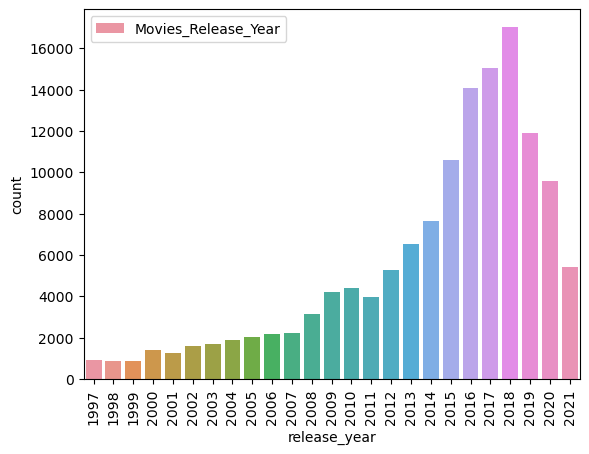

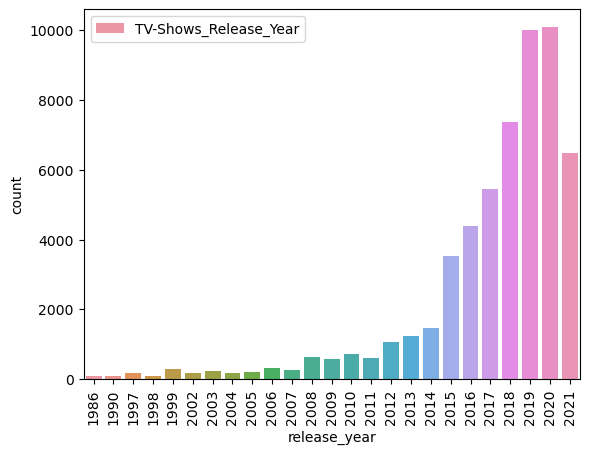

In [83]:
# countplot for release_year
#movies
top_25_releaseyears=df_final_movies.loc[(df_final_movies["release_year"].isin(top_25_years))]
sns.countplot(data=top_25_releaseyears,x="release_year")
plt.xticks(rotation=90)
plt.legend(["Movies_Release_Year"])
plt.show()
# seasons
top_25_releaseyears1=df_final_season.loc[(df_final_season["release_year"].isin(top_25_years1))]
sns.countplot(data=top_25_releaseyears1,x="release_year")
plt.xticks(rotation=90)
plt.legend(["TV-Shows_Release_Year"]) 
plt.show()


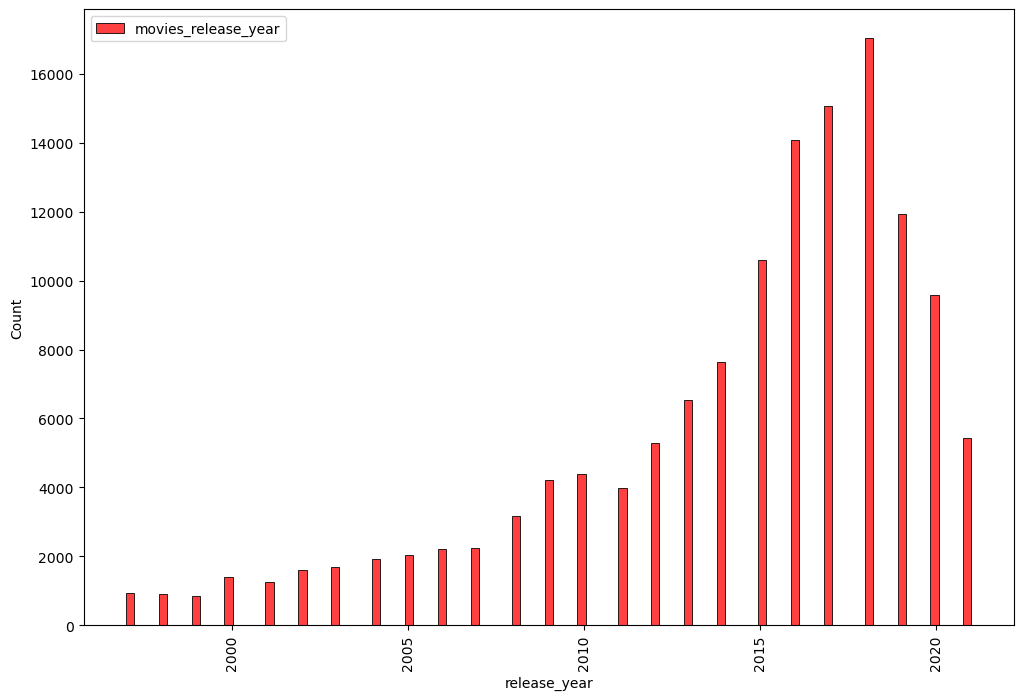

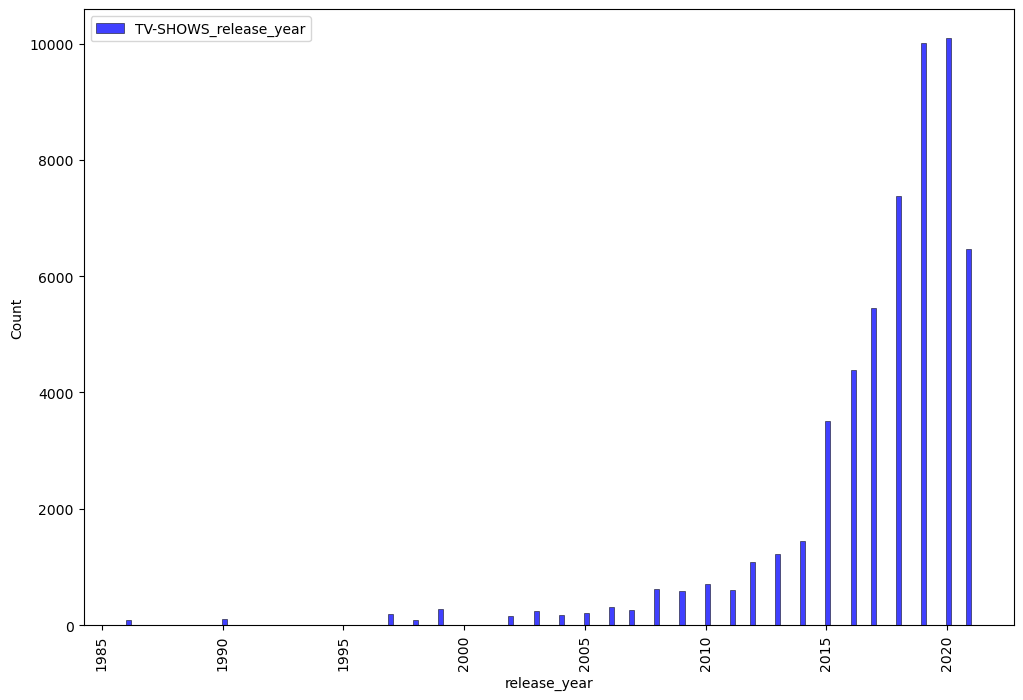

In [102]:
# histplot for release_year
# movies
plt.figure(figsize=(12, 8))
top_25_releaseyears_copy = top_25_releaseyears.copy()
top_25_releaseyears_copy["release_year"] = top_25_releaseyears_copy["release_year"].replace([np.inf, -np.inf], np.nan)  # Replace inf values with NaN
sns.histplot(data=top_25_releaseyears_copy, x="release_year", color="red")
plt.xticks(rotation=90)
plt.legend(["movies_release_year", "counts"])
plt.show()

# seasons
plt.figure(figsize=(12, 8))
top_25_releaseyears1_copy = top_25_releaseyears1.copy()
top_25_releaseyears1_copy["release_year"] = top_25_releaseyears1_copy["release_year"].replace([np.inf, -np.inf], np.nan)  # Replace inf values with NaN
sns.histplot(data=top_25_releaseyears1_copy, x="release_year", color="blue")
plt.xticks(rotation=90)
plt.legend(["TV-SHOWS_release_year"])
plt.show()


<Figure size 1500x2000 with 0 Axes>

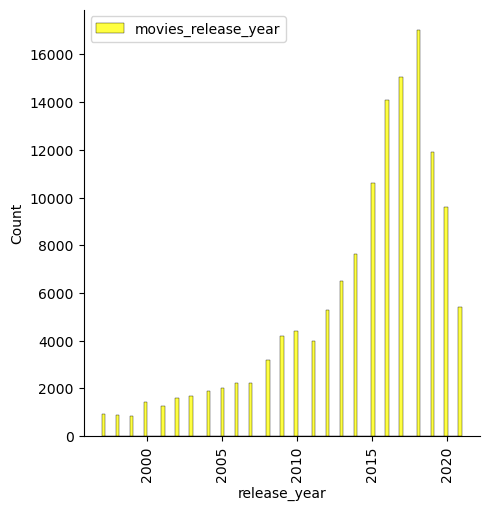

<Figure size 1500x2000 with 0 Axes>

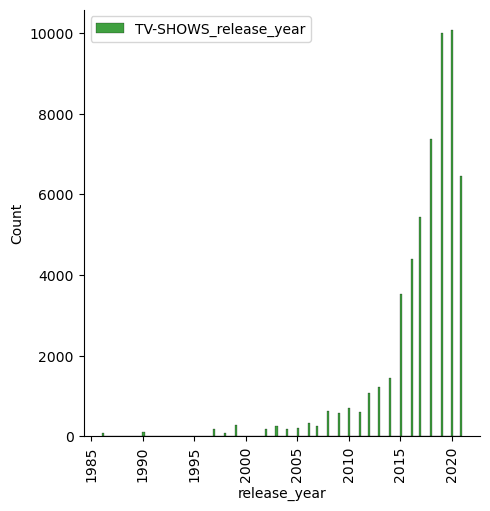

In [103]:
# Displot for Release_years
#movies
plt.figure(figsize=(15,20))
sns.displot(data=top_25_releaseyears,x="release_year",color="yellow")
plt.xticks(rotation=90)
plt.legend(["movies_release_year","counts"])
plt.show()
#seasons
plt.figure(figsize=(15,20))
top_25_releaseyears1=df_final_season.loc[(df_final_season["release_year"].isin(top_25_years1))]
sns.displot(data=top_25_releaseyears1,x="release_year",color="green")
plt.xticks(rotation=90)
plt.legend(["TV-SHOWS_release_year"])            
plt.show()

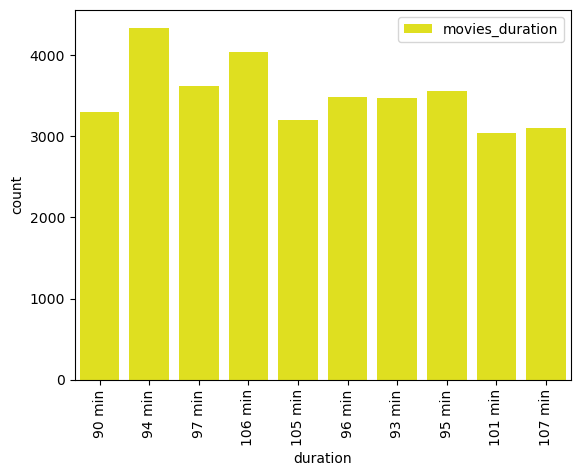

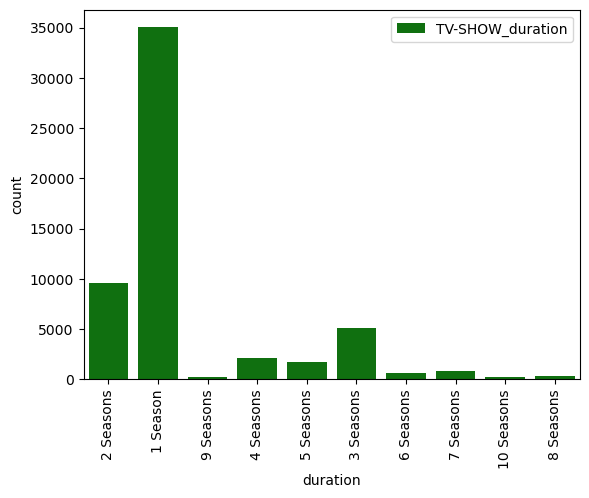

In [59]:
#Countplot for duration
#movies
top_10_duration_movies=df_final_movies.loc[(df_final_movies["duration"].isin(top_10_duration))]
sns.countplot(data=top_10_duration_movies,x="duration",color="yellow")
plt.xticks(rotation=90)
plt.legend(["movies_duration"])
plt.show()
#seaons
top_10_duration_season=df_final_season.loc[(df_final_season["duration"].isin(top_10_duration1))]
sns.countplot(data=top_10_duration_season,x="duration",color="green")
plt.xticks(rotation=90)
plt.legend(["TV-SHOW_duration"])
plt.show()

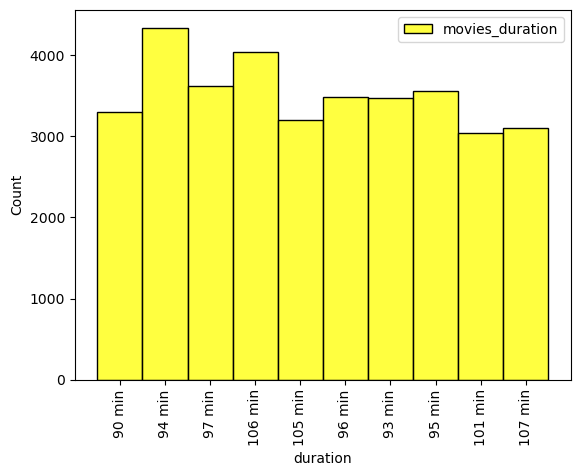

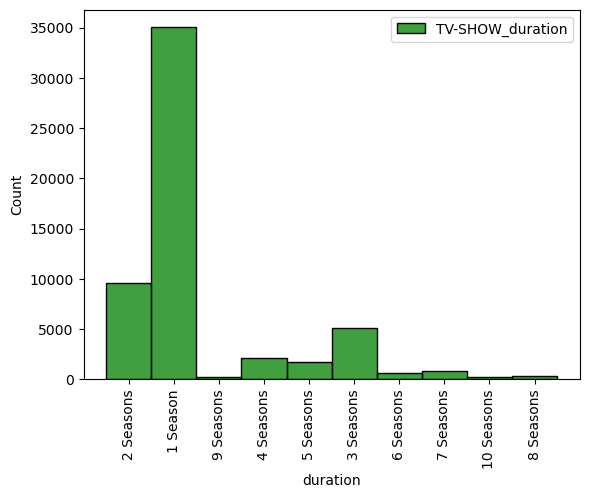

In [104]:
# histplot for release_year
#movies
top_10_duration_movies=df_final_movies.loc[(df_final_movies["duration"].isin(top_10_duration))]
sns.histplot(data=top_10_duration_movies,x="duration",color="yellow")
plt.xticks(rotation=90)
plt.legend(["movies_duration"])
plt.show()
#seaons
top_10_duration_season=df_final_season.loc[(df_final_season["duration"].isin(top_10_duration1))]
sns.histplot(data=top_10_duration_season,x="duration",color="green")
plt.xticks(rotation=90)
plt.legend(["TV-SHOW_duration"])
plt.show()

### For categorical variable(s): Boxplot

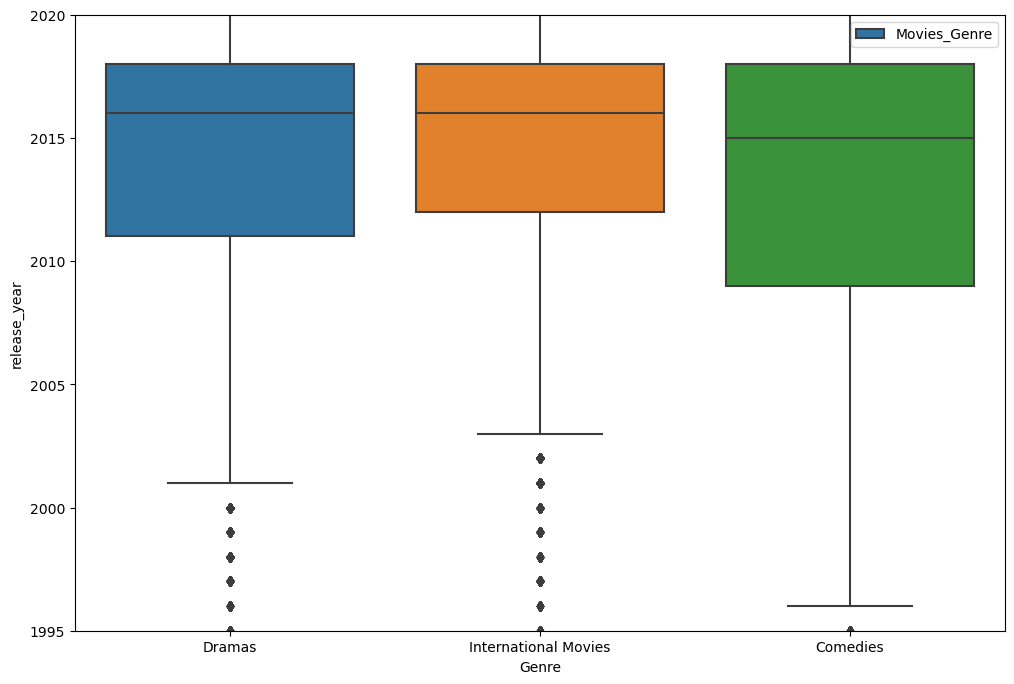

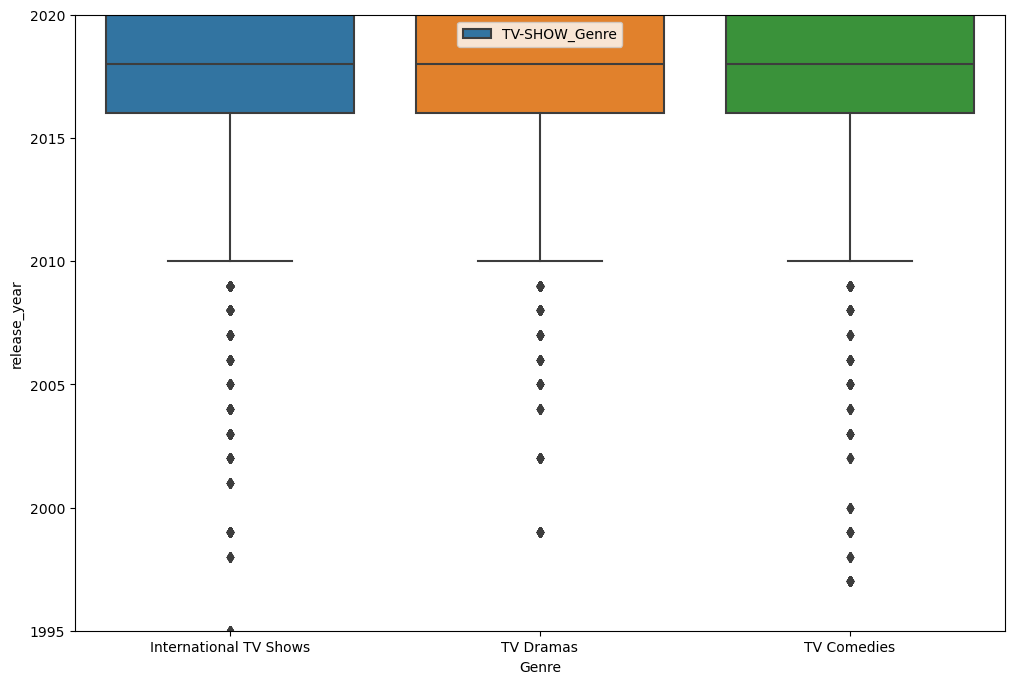

In [28]:
# TOP 3 Genre v/s last 25 years
#Movies
top_3_data_Genres=df_final_movies.loc[(df_final_movies["Genre"].isin(top_3_genres))]
plt.figure(figsize=(12,8))
sns.boxplot(data=top_3_data_Genres,x="Genre",y="release_year")
plt.ylim(bottom=1995,top=2020)
plt.legend(["Movies_Genre"])
plt.show()
#TV-SHOWS
top_3_data_Genres1=df_final_season.loc[(df_final_season["Genre"].isin(top_3_genres1))]
plt.figure(figsize=(12,8))
sns.boxplot(data=top_3_data_Genres1,x="Genre",y="release_year")
plt.ylim(bottom=1995,top=2020)
plt.legend(["TV-SHOW_Genre"])
plt.show()

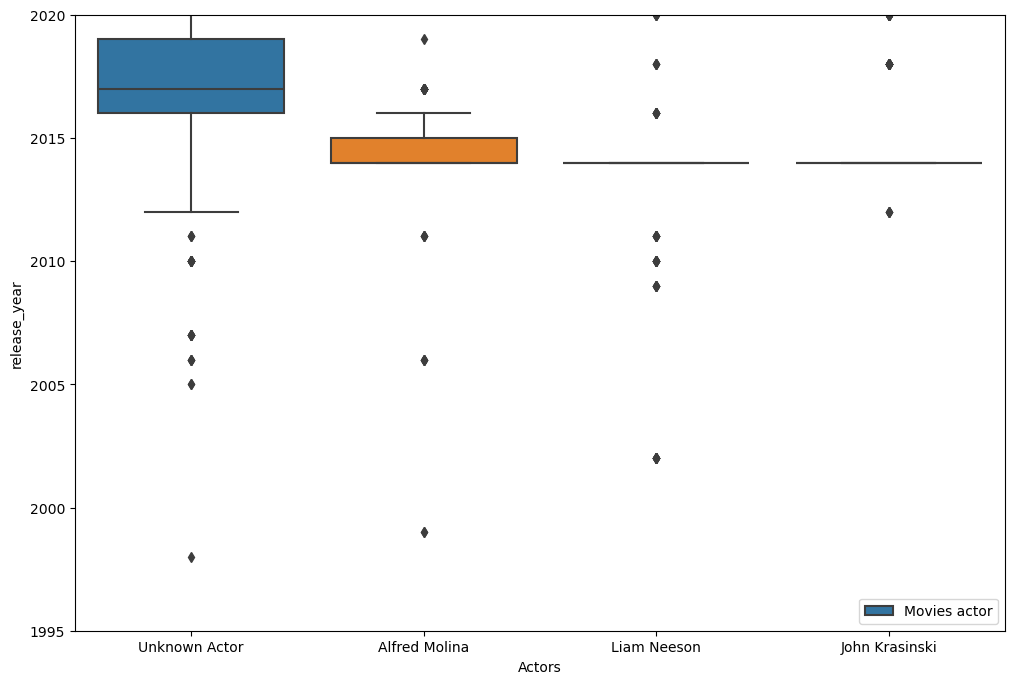

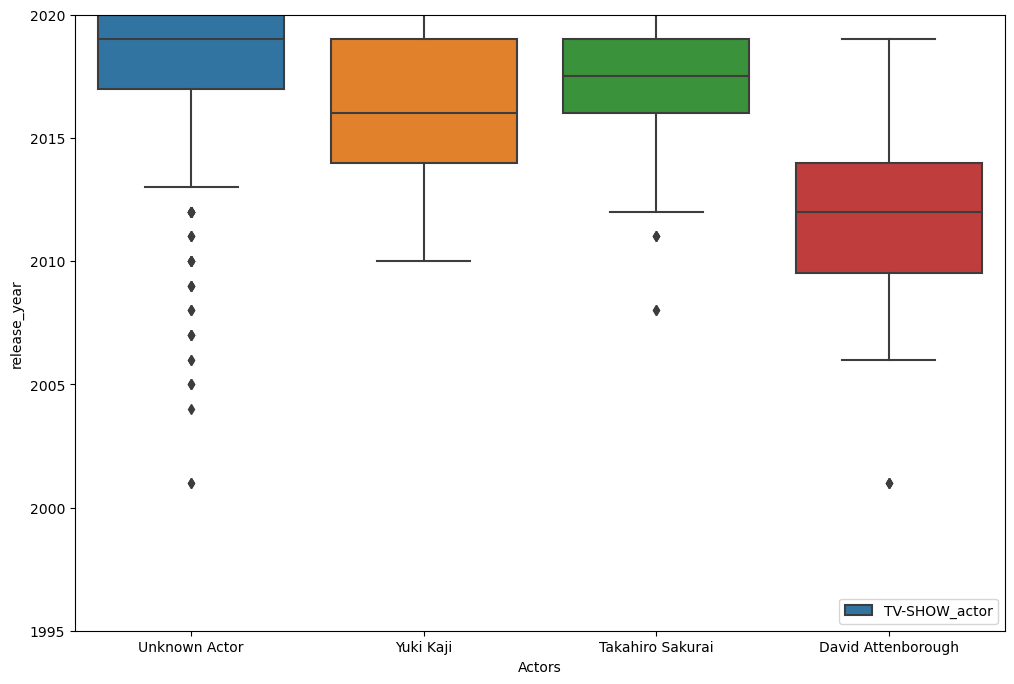

In [29]:
# TOP 4 Actor v/s last 25 years
#Movies
top_3_data_actors=df_final_movies.loc[(df_final_movies["Actors"].isin(top_3_actors))]
plt.figure(figsize=(12,8))
sns.boxplot(data=top_3_data_actors,x="Actors",y="release_year")
plt.ylim(bottom=1995,top=2020)
plt.legend(["Movies actor"])
plt.show()
#TV-SHOWS
top_3_data_actors1=df_final_season.loc[(df_final_season["Actors"].isin(top_3_actors1))]
plt.figure(figsize=(12,8))
sns.boxplot(data=top_3_data_actors1,x="Actors",y="release_year")
plt.ylim(bottom=1995,top=2020)
plt.legend(["TV-SHOW_actor"])
plt.show()

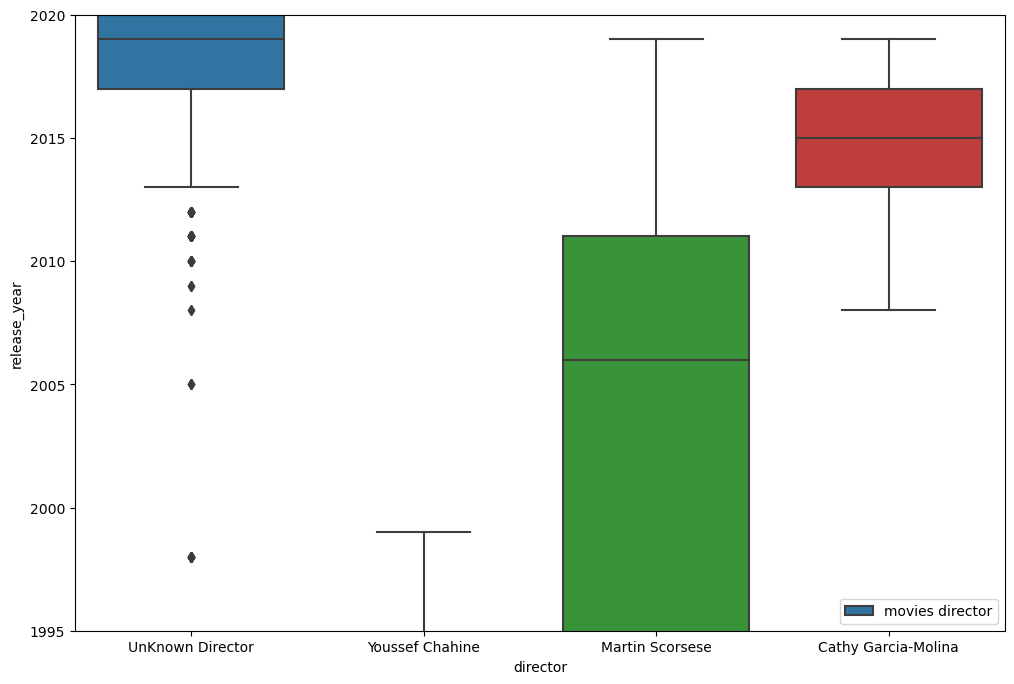

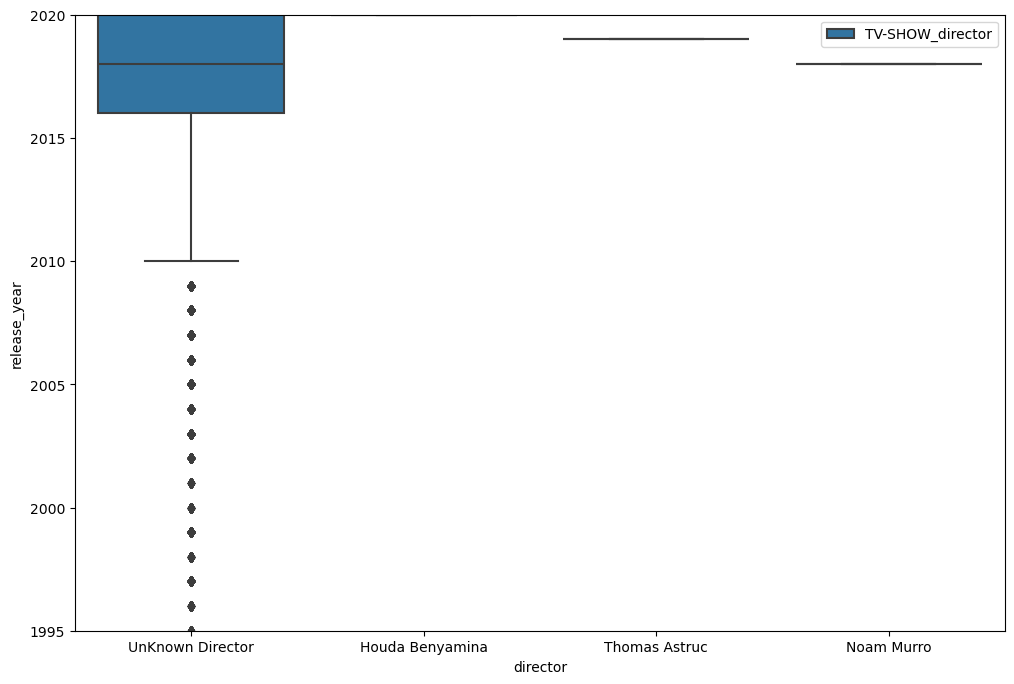

In [57]:
# Directors v/s last 25 years
#Movies
top_3_data_directors=df_final_movies.loc[(df_final_movies["director"].isin(top_3_directors))]
plt.figure(figsize=(12,8))
sns.boxplot(data=top_3_data_directors,x="director",y="release_year")
plt.ylim(bottom=1995,top=2020)
plt.legend(["movies director"])
plt.show()
#TV-SHOWS
top_3_data_directors1=df_final_season.loc[(df_final_season["director"].isin(top_3_directors1))]
plt.figure(figsize=(12,8))
sns.boxplot(data=top_3_data_directors1,x="director",y="release_year")
plt.ylim(bottom=1995,top=2020)
plt.legend(["TV-SHOW_director"])
plt.show()

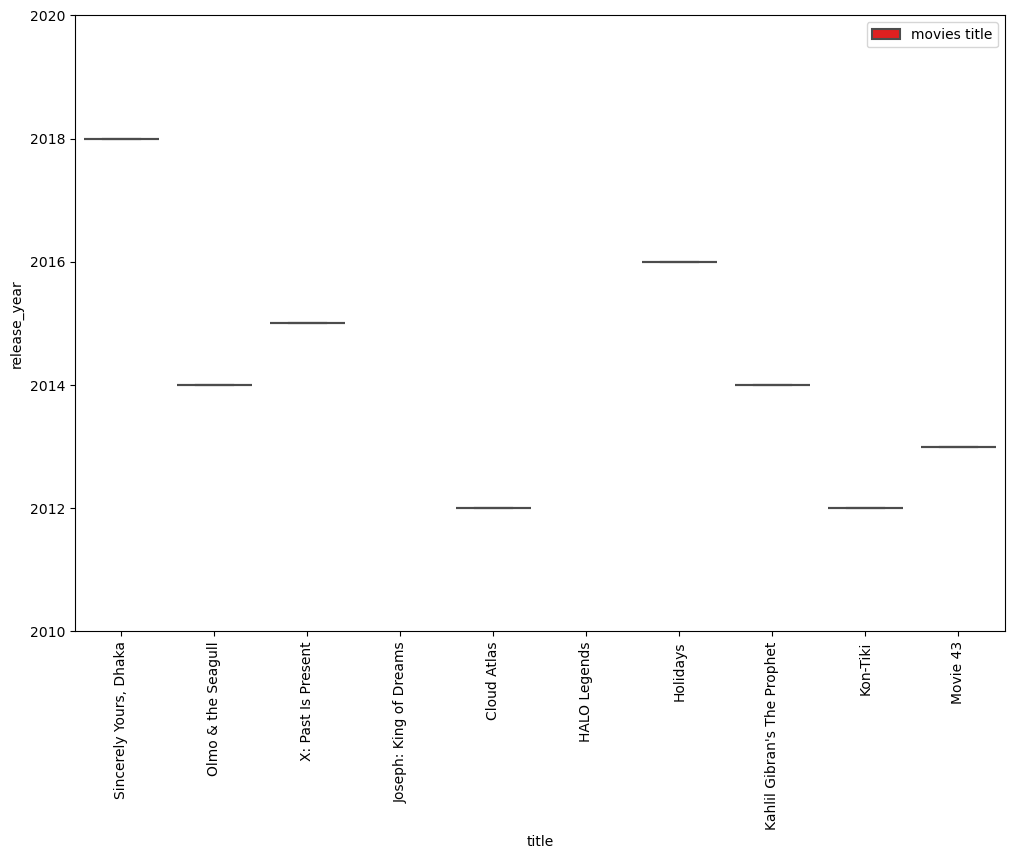

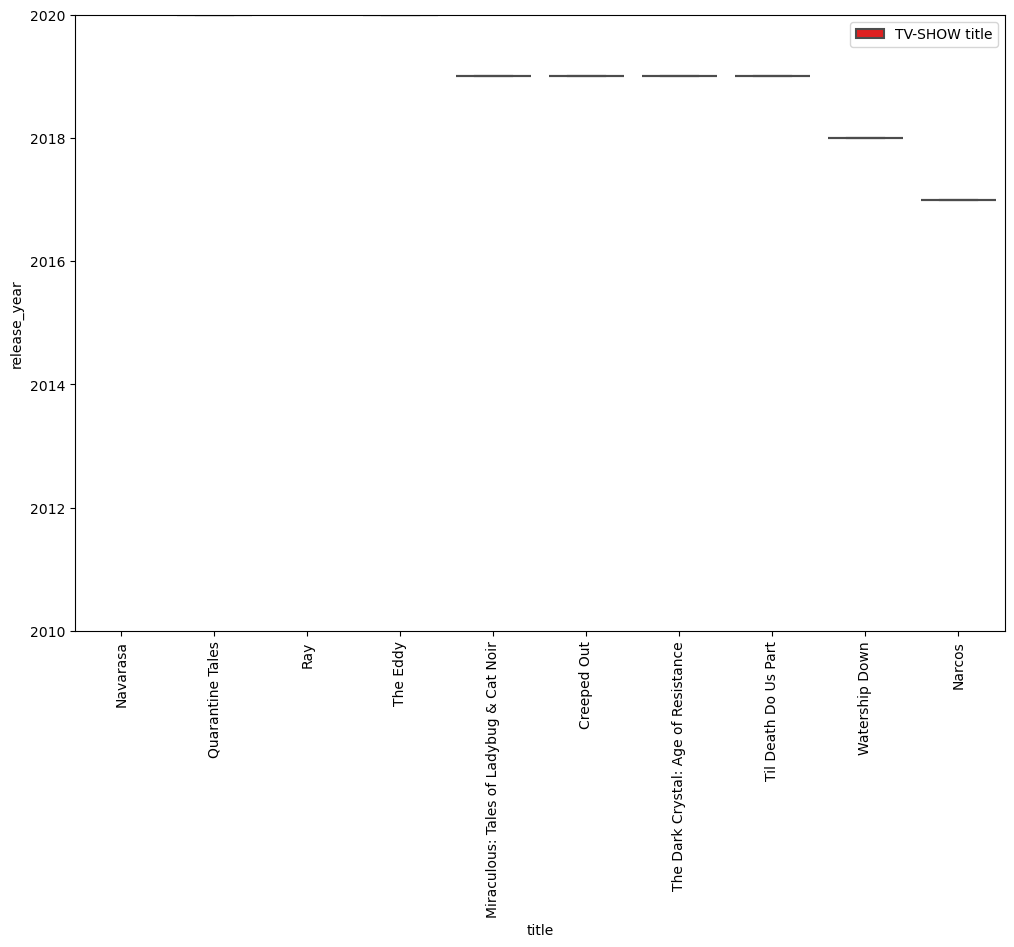

In [31]:
# top Titles v/s last 10 years
#Movies
top_3_data_titles=df_final_movies.loc[(df_final_movies["title"].isin(top_3_titles))]
plt.figure(figsize=(12,8))
sns.boxplot(data=top_3_data_titles,x="title",y="release_year",color="red")
plt.ylim(bottom=2010,top=2020)
plt.legend(["movies title"])
plt.xticks(rotation=90)
plt.show()

# TV-SHOWS
top_3_data_titles1=df_final_season.loc[(df_final_season["title"].isin(top_3_titles1))]
plt.figure(figsize=(12,8))
sns.boxplot(data=top_3_data_titles1,x="title",y="release_year",color="red")
plt.ylim(bottom=2010,top=2020)
plt.legend(["TV-SHOW title"])
plt.xticks(rotation=90)
plt.show()

### For correlation: Heatmaps, Pairplots

In [32]:
top_data_actors_directors=df_final_movies.loc[(df_final_movies["Actors"].isin(top_3_actors)) & (df_final_movies["director"].isin(top_3_directors))]
top_data_actors_directors

,title,Actors,country,Genre,director,type,release_year,rating,duration,month
10052,9to5: The Story of a Movement,Unknown Actor,NaN,Documentaries,UnKnown Director,Movie,2021,TV-MA,85 min,July 22
16652,Sisters on Track,Unknown Actor,NaN,Documentaries,UnKnown Director,Movie,2021,PG,97 min,June 24
16653,Sisters on Track,Unknown Actor,NaN,Sports Movies,UnKnown Director,Movie,2021,PG,97 min,June 24
18759,Trese After Dark,Unknown Actor,NaN,Anime Features,UnKnown Director,Movie,2021,TV-14,36 min,June 11
18760,Trese After Dark,Unknown Actor,NaN,Documentaries,UnKnown Director,Movie,2021,TV-14,36 min,June 11
...,...,...,...,...,...,...,...,...,...,...
183414,Smash: Motorized Mayhem,Unknown Actor,United States,Documentaries,UnKnown Director,Movie,2017,TV-MA,66 min,May 15
183415,Smash: Motorized Mayhem,Unknown Actor,United States,Sports Movies,UnKnown Director,Movie,2017,TV-MA,66 min,May 15
189358,The Darkest Dawn,Unknown Actor,United Kingdom,Action & Adventure,UnKnown Director,Movie,2016,TV-MA,75 min,June 23
189359,The Darkest Dawn,Unknown Actor,United Kingdom,Independent Movies,UnKnown Director,Movie,2016,TV-MA,75 min,June 23


<Figure size 2000x1500 with 0 Axes>

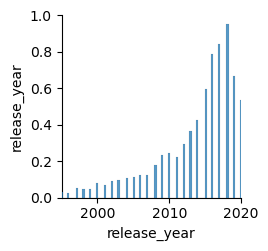

In [105]:
plt.figure(figsize=(20,15))
sns.pairplot(data=df_final_movies)
plt.xlim(left=1995,right=2020)
plt.show()


# plt.ylim(bottom=0,top=1)

### Insights based on Non-Graphical and Visual Analysis 

#### 1. Comments on the range of attributes

1.Based on the given data, we observe that there are wide variety of Genres present nowdays which give many content to users. 
2.The platform helps the user to display the most watched shows.

#### 2. Comments on the distribution of the variables and relationship between them

1.Through the data we have have observe there are relationship betwwen directors , casting and actors.
2.As the years are moving forward the Rating depend directly on cast and type of Genre title belogs too.

#### 3. Comments for each univariate and bivariate plot

For univariate plots: 
1.As the years are moving craze in people for seeing movies and tv-shows are increasing. 
2.For the duration I see that in movies people like to watch movies duration between 90 to 100 minutes time interval and for tv shows people has high craze for shows having 1 or 2 seasons.

For bivariate plots: 
1.People like to watch high rating movies and shows.

## Business Insights

#### INSIGHT 1

<Axes: xlabel='type', ylabel='count'>

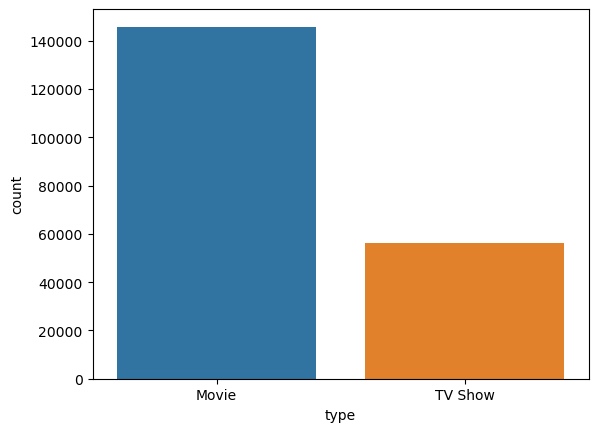

In [34]:
sns.countplot(data=df_final,x="type")

#### Result:

The graph shows that the demands of movie is higher than the TV Shows

#### INSIGHT 2

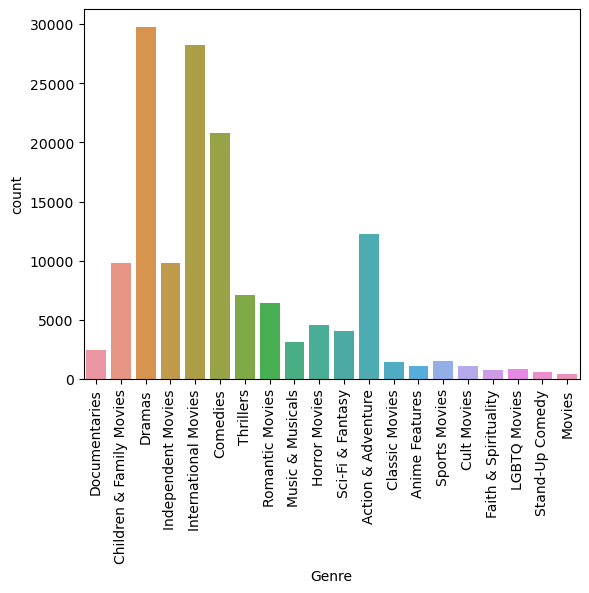

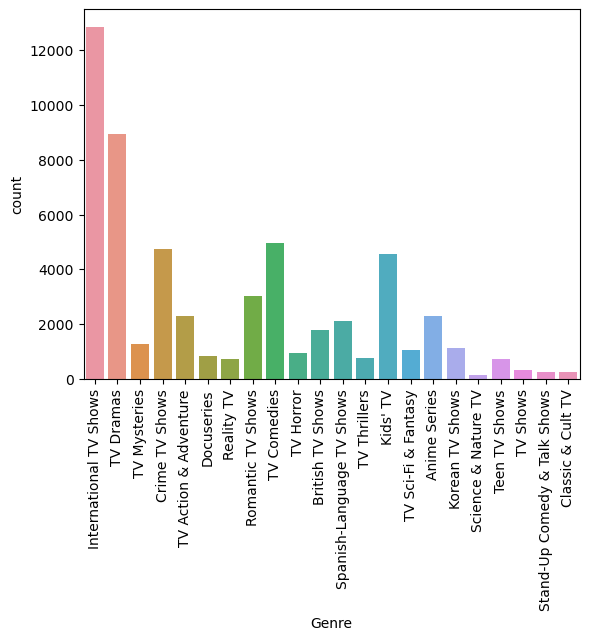

In [63]:
#movies
sns.countplot(data=df_final_movies,x="Genre")
plt.xticks(rotation=90)
plt.show()

#seasons
sns.countplot(data=df_final_season,x="Genre")
plt.xticks(rotation=90)
plt.show()


#### Results:

From the above graph it shows that users are more intrested in Dramas from Movie category whereas from TV Shows International TV Shows are more popular.

### INSIGHT 3

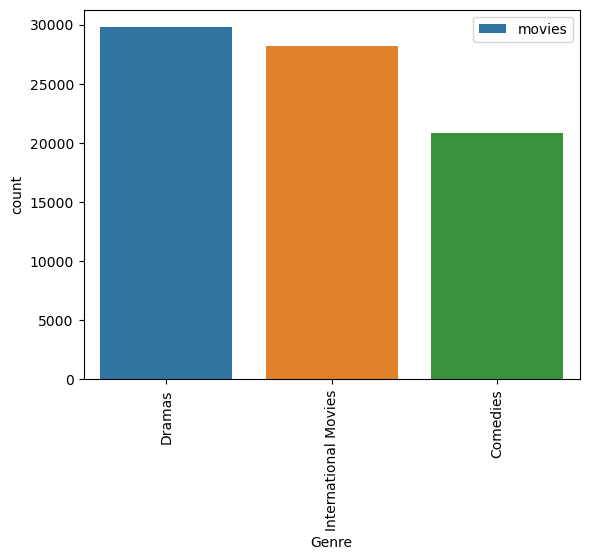

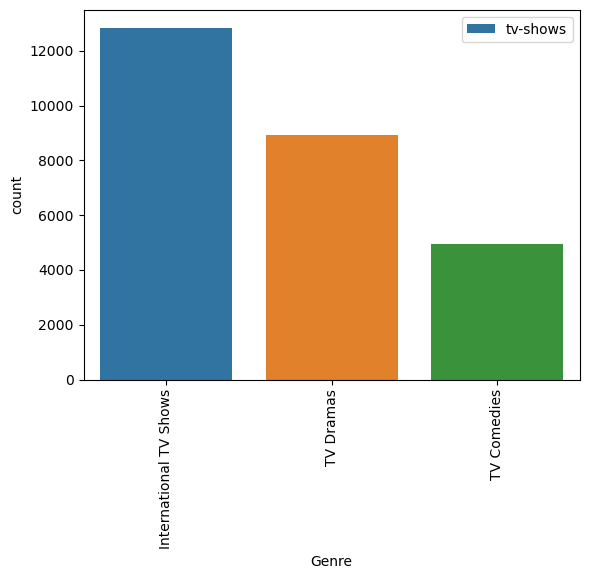

In [106]:
#movies
top_3_data_Genres=df_final_movies.loc[(df_final_movies["Genre"].isin(top_3_genres))]
sns.countplot(data=top_3_data_Genres,x="Genre")
plt.xticks(rotation=90)
plt.legend(["movies"])
plt.show()
#season
top_3_data_Genres1=df_final_season.loc[(df_final_season["Genre"].isin(top_3_genres1))]
sns.countplot(data=top_3_data_Genres1,x="Genre")
plt.xticks(rotation=90)
plt.legend(["tv-shows"])
plt.show()

#### Result:

From the above graph we can conclude that the Dramas, International Movies, Comedies are 3 genre from Movies which are more popular among the Netflix users and among TV shows also these 3 genre are only popular.

### INSIGHT 4

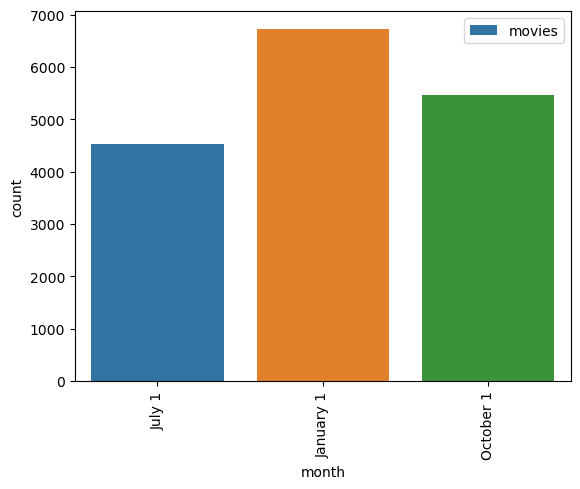

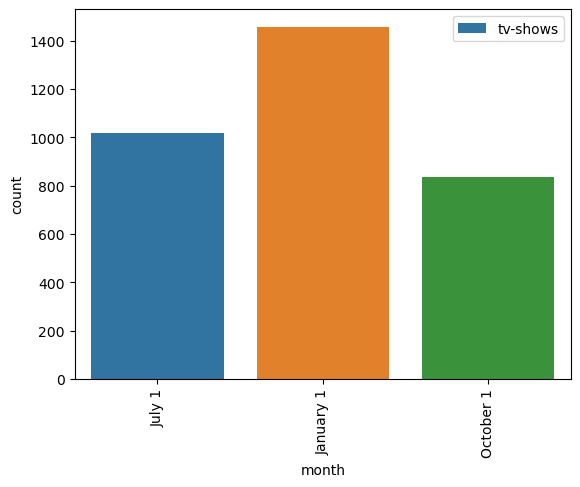

In [107]:
# movies
top_3_data_months=df_final_movies.loc[(df_final_movies["month"].isin(top_3_months))]
sns.countplot(data=top_3_data_months,x="month")
plt.xticks(rotation=90)
plt.legend(["movies"])
plt.show()
#seasons
top_3_data_months1=df_final_season.loc[(df_final_season["month"].isin(top_3_months))]
sns.countplot(data=top_3_data_months1,x="month")
plt.xticks(rotation=90)
plt.legend(["tv-shows"])
plt.show()

#### Result:

Based on the observed graph, it can be inferred that movies and TV shows released in January, July, and October are more likely to be watched by users compared to other months. 

### INSIGHT 5

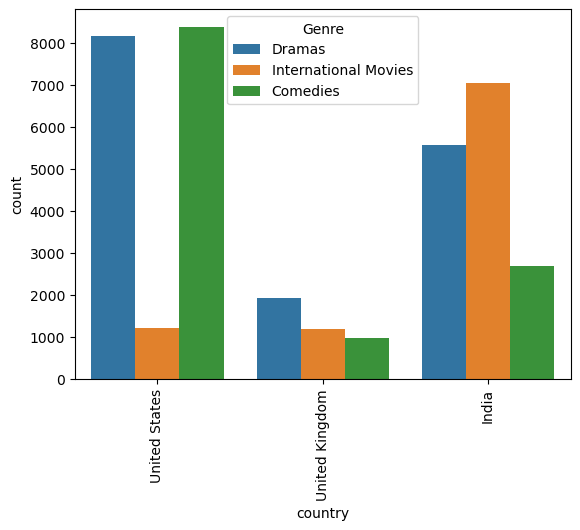

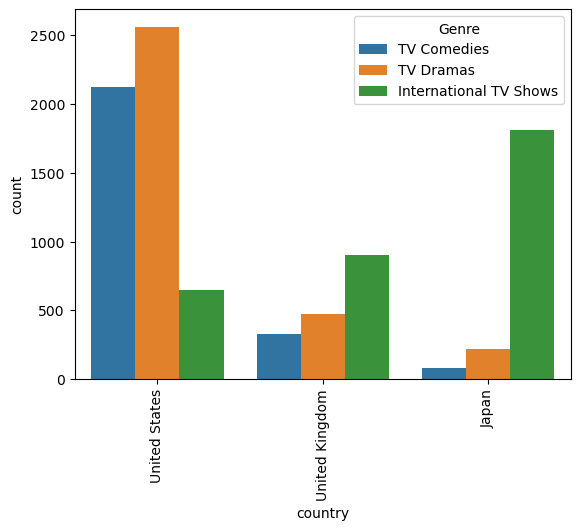

In [108]:
#movies
top_3_data_Genres_countries=df_final_movies.loc[(df_final_movies["Genre"].isin(top_3_genres)) & (df_final_movies["country"].isin(top_3_countries))]
sns.countplot(data=top_3_data_Genres_countries,x="country",hue="Genre")
plt.xticks(rotation=90)
# plt.legend(["movies"])
plt.show()
#seasons
top_3_data_Genres_countries=df_final_season.loc[(df_final_season["Genre"].isin(top_3_genres1)) & (df_final_season["country"].isin(top_3_countries1))]
sns.countplot(data=top_3_data_Genres_countries,x="country",hue="Genre")
plt.xticks(rotation=90)
plt.show()

#### Results:

From the analysis, it is evident that in the top three countries:

For Movies:

United States (US): Comedies are the most favored genre.
United Kingdom (UK): Dramas are the top genre of choice.
India: International movies are particularly popular.
For TV Shows:

United States (US): TV Dramas stand out as the preferred genre.
United Kingdom (UK): International TV Shows take the lead.
Japan: International TV Shows are prominently watched.
It's noteworthy that both in movies and TV shows, the United States and the United Kingdom consistently emerge as key players in shaping viewing preferences.

### INSIGHT 6

Text(0.5, 1.0, 'release_year v/s rating')

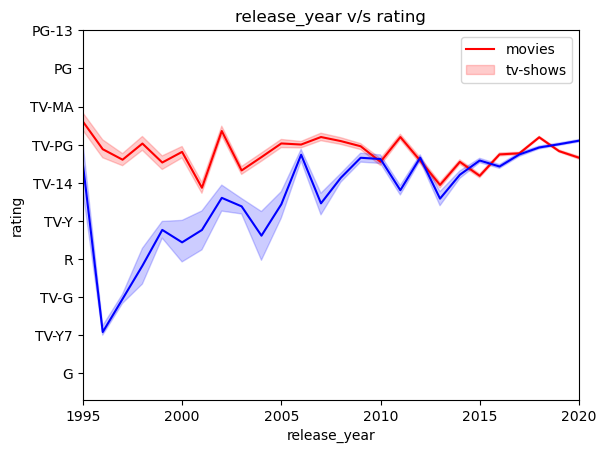

In [109]:
#movies and seasons
sns.lineplot(data=df_final_movies,
            x="release_year",
            y="rating",color="red")
plt.xlim(left=1995,right=2020)
sns.lineplot(data=df_final_season,
            x="release_year",
            y="rating",color="blue")
plt.xlim(left=1995,right=2020)
plt.legend(["movies","tv-shows"])
plt.title("release_year v/s rating")

#### Result:

Results indicate that over the last 25 years, the ratings for movies have remained relatively stable, showing little fluctuation. On the other hand, for TV shows, there has been a significant and positive trend, with ratings experiencing a notable increase. This observation suggests a growing preference for TV shows among viewers, reflecting a positive shift in audience engagement towards television content.

## Recommendations - Actionable items for business

1. Netflix should consider prioritizing the production of more movie content over TV shows based on the observation that, over the past 25 years, movie ratings have remained consistently level.

2. Additionally, there is a need for Netflix to pay attention to the quality and appeal of movie content. Despite the stable ratings, a strategic shift in movie content could lead to an increase in ratings over the coming years, mirroring the positive trajectory observed in TV show ratings.

3. Netflix should strategically focus on sourcing and promoting content from countries such as the United States, the United Kingdom, Japan, and India, recognizing their significance as key markets with consistent viewing preferences.

4. To maximize revenue, Netflix should encourage directors to release shows, particularly movies, during peak viewing months like January, July, and October, capitalizing on observed trends in user engagement during these periods.

5. Given the preference for Comedy genres in movies and International TV Shows in TV programming, Netflix should prioritize the creation and promotion of content in these specific genres to cater to viewer preferences.

6. Targeting movies featuring popular actors like Alfred Molina, Liam Neeson, and John Krasinski, and TV shows with actors like Yuki Kaji, Takahiro Sakurai, and David Attenborough could enhance the platform's content appeal and viewer engagement.

7. Collaborating with renowned directors such as Youssef Chahine, Martin Scorsese, and Cathy Garcia for movies, and Houda Benyamina, Thomas Astruc, and Noam Murro for TV shows, could further enhance the quality and diversity of Netflix's content.

8. To optimize content consumption, Netflix should focus on the duration of movies within the range of 90-110 minutes and limit TV show seasons to 1-2, aligning with observed preferences for shorter durations.

9. Considering the success factors of similar platforms, Netflix should also analyze the content strategies of competitors to identify regional focuses and tailor its content offerings accordingly for better growth and market penetration.